In [1]:
!pip install scikit-learn

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [5]:
df=pd.read_csv("/content/drive/MyDrive/image_feature_dataset.csv")

In [ ]:
df.head()

,file_name,class_label,width,height,aspect_ratio,file_size_kb,mean_intensity,std_intensity,skewness,kurtosis,entropy,edge_density,pixel_density
0,s1_1.tif,Canon120-1,512,512,1.0,6366.801758,0.972213,0.104171,-4.147706,16.985540,0.879780,0.128208,0.989296
1,s1_2.tif,Canon120-1,512,512,1.0,6366.801758,0.958926,0.098556,-2.831427,8.287846,1.616051,0.201668,0.996838
2,s1_3.tif,Canon120-1,512,512,1.0,6366.801758,0.978738,0.084658,-5.088680,29.288396,0.834299,0.115170,0.991600
3,s1_4.tif,Canon120-1,512,512,1.0,6366.801758,0.968957,0.094503,-3.621734,13.807776,1.220002,0.177536,0.993942
4,s1_5.tif,Canon120-1,512,512,1.0,6366.801758,0.988882,0.058514,-6.888712,54.125970,0.551839,0.059498,0.996807


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   file_name       2200 non-null   object 
 1   class_label     2200 non-null   object 
 2   width           2200 non-null   int64  
 3   height          2200 non-null   int64  
 4   aspect_ratio    2200 non-null   float64
 5   file_size_kb    2200 non-null   float64
 6   mean_intensity  2200 non-null   float64
 7   std_intensity   2200 non-null   float64
 8   skewness        2200 non-null   float64
 9   kurtosis        2200 non-null   float64
 10  entropy         2200 non-null   float64
 11  edge_density    2200 non-null   float64
 12  pixel_density   2200 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 223.6+ KB


In [ ]:
df.nunique()

,0
file_name,1100
class_label,11
width,1
height,1
aspect_ratio,1
file_size_kb,15
mean_intensity,2200
std_intensity,2200
skewness,2200
kurtosis,2200


In [ ]:
df['class_label'].value_counts()

,count
class_label,
Canon120-1,200
Canon220,200
EpsonV370-2,200
EpsonV370-1,200
Canon9000-2,200
Canon120-2,200
HP,200
EpsonV39-2,200
EpsonV550,200


In [ ]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Drop non-numeric columns
X = df.drop(columns=['class_label']).select_dtypes(include=['number'])
y = df['class_label']

mi = mutual_info_classif(X, y, discrete_features='auto')
mi = pd.Series(mi, index=X.columns).sort_values(ascending=False)

print("Top MI features for classification:\n", mi.head(22))

Top MI features for classification:
 file_size_kb      1.598010
entropy           0.584347
mean_intensity    0.276854
skewness          0.035382
kurtosis          0.033839
width             0.010797
height            0.000000
aspect_ratio      0.000000
std_intensity     0.000000
edge_density      0.000000
pixel_density     0.000000
dtype: float64


In [ ]:
from sklearn.preprocessing import LabelEncoder, QuantileTransformer

le = LabelEncoder()
df['class_label'] = le.fit_transform(df['class_label'])

QT = QuantileTransformer(output_distribution='normal')

df[['mean_intensity']] = QT.fit_transform(df[['mean_intensity']])


In [ ]:
dm_skew = df[['width','height','aspect_ratio',"skewness"]]
skew = pd.DataFrame(dm_skew.skew())
skew.columns = ['skew']
skew['too_skewed'] = skew['skew'] > .75
skew.style.background_gradient(cmap='Blues')

,skew,too_skewed
width,0.000000,False
height,0.000000,False
aspect_ratio,0.000000,False
skewness,-0.282042,False


In [ ]:
# 1. Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# 3. Basic Information
print("Dataset Shape:", df.shape)
print("\nColumn Names:", list(df.columns))
print("\nMissing Values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)
print("\nStatistical Summary:\n", df.describe())

Dataset Shape: (2200, 13)

Column Names: ['file_name', 'class_label', 'width', 'height', 'aspect_ratio', 'file_size_kb', 'mean_intensity', 'std_intensity', 'skewness', 'kurtosis', 'entropy', 'edge_density', 'pixel_density']

Missing Values:
 file_name         0
class_label       0
width             0
height            0
aspect_ratio      0
file_size_kb      0
mean_intensity    0
std_intensity     0
skewness          0
kurtosis          0
entropy           0
edge_density      0
pixel_density     0
dtype: int64

Data Types:
 file_name          object
class_label        object
width               int64
height              int64
aspect_ratio      float64
file_size_kb      float64
mean_intensity    float64
std_intensity     float64
skewness          float64
kurtosis          float64
entropy           float64
edge_density      float64
pixel_density     float64
dtype: object

Statistical Summary:
         width  height  aspect_ratio  file_size_kb  mean_intensity  \
count  2200.0  2200.0      

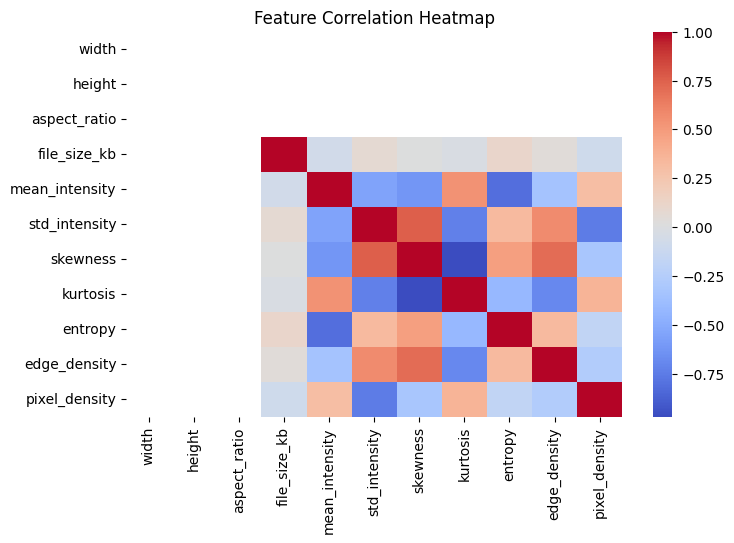

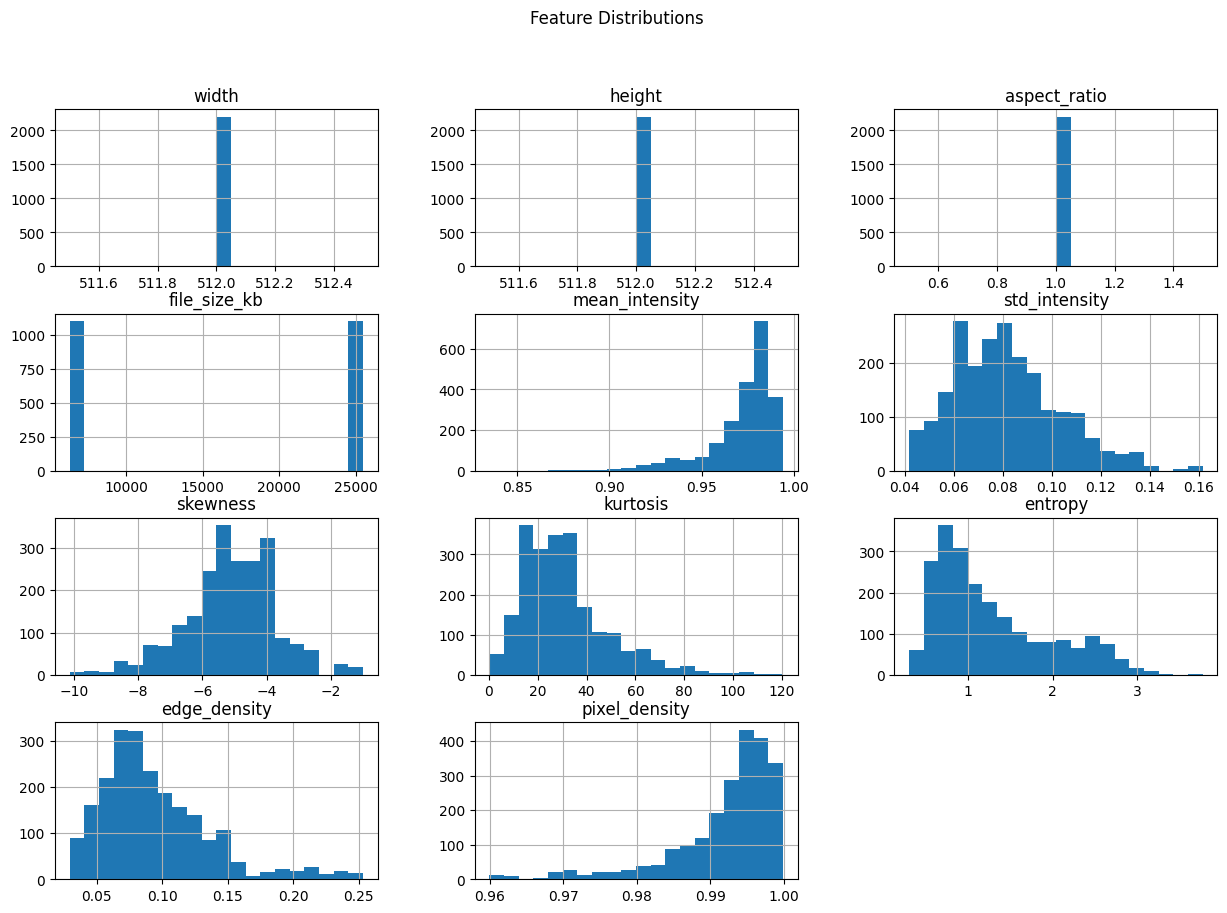

In [ ]:
# 4. Data Visualization (numeric columns only)
numeric_data = df.select_dtypes(include=[np.number])

plt.figure(figsize=(8,5))
sns.heatmap(numeric_data.corr(), annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

numeric_data.hist(figsize=(15,10), bins=20)
plt.suptitle("Feature Distributions")
plt.show()

In [ ]:
# 5. Data Preprocessing
target_col = 'class_label'  # Your target column
X = df.drop(columns=['file_name', target_col])  # Drop non-numeric + target
y = df[target_col]

In [ ]:
# Encode target if it's non-numeric
y = pd.factorize(y)[0]

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# 6. Train and Evaluate Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

for name, model in models.items():
    print(f"\nModel: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


Model: Logistic Regression
Accuracy: 0.30227272727272725
Confusion Matrix:
 [[ 1  1  0  0 11 15  0  1  1  8  2]
 [ 5  0  0  0 15  4  0  2  5 11  4]
 [ 0  0 19 24  0  0  0  0  4  0  0]
 [ 0  0  7 28  0  0  0  0  3  0  1]
 [ 3  0  0  0  4  9  0  2  2 14  0]
 [ 0  0  0  0 13 13  0  2  1 10  1]
 [ 0  0  0  1  0  0 32  0  0  0  0]
 [ 1  2  0  1  7  2  0  5  7  4 11]
 [ 0  2  3  1  0  1  0  5 24  0  1]
 [ 4  0  1  0 14 17  0  3  3  2  0]
 [ 4  4  0  0  6  8  0  5  4  4  5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.06      0.03      0.03        40
           1       0.00      0.00      0.00        46
           2       0.63      0.40      0.49        47
           3       0.51      0.72      0.60        39
           4       0.06      0.12      0.08        34
           5       0.19      0.33      0.24        40
           6       1.00      0.97      0.98        33
           7       0.20      0.12      0.15        40
           8   

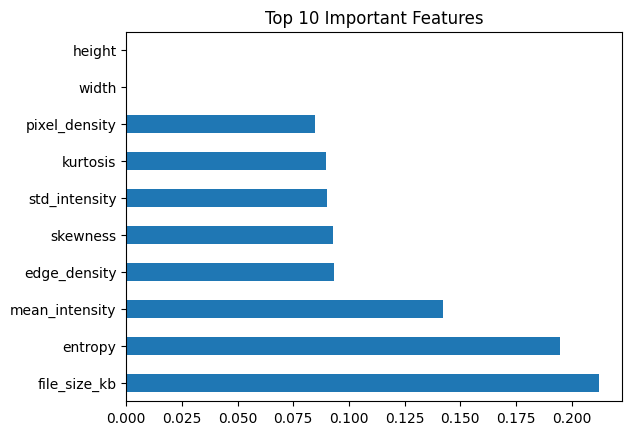

In [ ]:
# 7. Feature Importance (for Random Forest)
rf = models["Random Forest"]
importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=X.columns)
feat_imp.nlargest(10).plot(kind='barh', title="Top 10 Important Features")
plt.show()

In [ ]:
def classification(model, X, y):
    # Split data for training and testing
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=25, stratify=y
    )

    # Train the model
    model.fit(X_train, y_train)

    # Predict on training data
    y_pred_train = model.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_pred_train)

    # Predict on test data
    y_pred = model.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_pred)

    # Compute multiclass metrics
    precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

    '''    # ROC AUC for multiclass ()
    if hasattr(model, "predict_proba"):
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
    else:
        roc_auc = np.nan
    '''
    # Create a metrics DataFrame
    df_metrics = pd.DataFrame({
        'Training Accuracy': [accuracy_train],
        'Test Accuracy': [accuracy_test],
        'Precision': [precision],
        'Recall': [recall],
        'F1-Score': [f1]
    })

    # Format as percentages
    for col in df_metrics.columns:
        df_metrics[col] = df_metrics[col].map(lambda x: f'{x:.2%}' if pd.notnull(x) else 'N/A')

    print(df_metrics)

    # Confusion matrix
    labels = sorted(np.unique(y))
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    cm_percent = cm / cm.sum()

    # Plot confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm_percent, annot=True, fmt='.2%', cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.title("Confusion Matrix (%)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    return df_metrics

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Encode string class labels to numeric
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Classification function
def classification(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=25, stratify=y
    )

    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print(f"Accuracy: {acc:.4f}")

# Run models
print("Decision Tree:")
classification(DecisionTreeClassifier(random_state=42), X, y_encoded)

print("\nRandom Forest:")
classification(RandomForestClassifier(random_state=42), X, y_encoded)

print("\nXGBoost:")
classification(XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42), X, y_encoded)

print("\nAdaBoost:")
classification(AdaBoostClassifier(random_state=42), X, y_encoded)

print("\nGradient Boosting:")
classification(GradientBoostingClassifier(random_state=42), X, y_encoded)


Decision Tree:
Accuracy: 0.4045

Random Forest:
Accuracy: 0.3023

XGBoost:


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [19:41:48] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.4227

AdaBoost:
Accuracy: 0.4023

Gradient Boosting:
Accuracy: 0.5182


In [8]:
# --- Import all libraries ---
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# For handling imbalanced data
from imblearn.over_sampling import SMOTE

# --- Prepare data ---
# Assume your DataFrame is named df
# Separate features and target
X = df.drop(columns=['class_label'])
y = df['class_label']

# Encode target labels (convert strings to numbers)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# ✅ Convert all categorical (non-numeric) columns into numeric
# This prevents SMOTE from failing on string columns like filenames
X_encoded = pd.get_dummies(X, drop_first=True)

# Handle imbalance using SMOTE
smote = SMOTE(random_state=42)
X_over, y_over = smote.fit_resample(X_encoded, y_encoded)

print("✅ Dataset balanced using SMOTE")
print("Class distribution after oversampling:")
print(pd.Series(y_over).value_counts())

# --- Define a reusable classification function ---
def classification(model, X, y):
    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=25, stratify=y
    )

    # Train model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


# --- Run models ---
print(" Decision Tree:")
classification(DecisionTreeClassifier(random_state=42), X_over, y_over)

print("\n Random Forest:")
classification(RandomForestClassifier(random_state=42), X_over, y_over)

print("\n XGBoost:")
classification(XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42), X_over, y_over)

print("\n AdaBoost:")
classification(AdaBoostClassifier(random_state=42), X_over, y_over)

print("\n Gradient Boosting:")
classification(GradientBoostingClassifier(random_state=42), X_over, y_over)



✅ Dataset balanced using SMOTE
Class distribution after oversampling:
0     200
2     200
6     200
5     200
4     200
1     200
10    200
8     200
9     200
3     200
7     200
Name: count, dtype: int64
 Decision Tree:
Accuracy: 0.4318

Classification Report:
              precision    recall  f1-score   support

  Canon120-1       0.10      0.10      0.10        40
  Canon120-2       0.19      0.23      0.21        40
    Canon220       0.26      0.23      0.24        40
 Canon9000-1       0.40      0.45      0.42        40
 Canon9000-2       0.39      0.35      0.37        40
 EpsonV370-1       0.39      0.45      0.42        40
 EpsonV370-2       0.38      0.38      0.38        40
  EpsonV39-1       0.40      0.45      0.42        40
  EpsonV39-2       0.32      0.28      0.30        40
   EpsonV550       1.00      0.85      0.92        40
          HP       0.98      1.00      0.99        40

    accuracy                           0.43       440
   macro avg       0.44      0.43

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:21:14] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.4227

Classification Report:
              precision    recall  f1-score   support

  Canon120-1       0.16      0.20      0.18        40
  Canon120-2       0.09      0.10      0.10        40
    Canon220       0.58      0.38      0.45        40
 Canon9000-1       0.29      0.35      0.31        40
 Canon9000-2       0.16      0.12      0.14        40
 EpsonV370-1       0.40      0.42      0.41        40
 EpsonV370-2       0.36      0.33      0.34        40
  EpsonV39-1       0.37      0.40      0.39        40
  EpsonV39-2       0.37      0.35      0.36        40
   EpsonV550       1.00      1.00      1.00        40
          HP       1.00      1.00      1.00        40

    accuracy                           0.42       440
   macro avg       0.43      0.42      0.43       440
weighted avg       0.43      0.42      0.43       440


Confusion Matrix:
[[ 8 27  5  0  0  0  0  0  0  0  0]
 [30  4  6  0  0  0  0  0  0  0  0]
 [13 12 15  0  0  0  0  0  0  0  0]
 [ 0  0  0 14 26  0

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.6614

Classification Report:
              precision    recall  f1-score   support

  Canon120-1       0.45      0.38      0.41        40
  Canon120-2       0.51      0.50      0.51        40
    Canon220       0.60      0.72      0.66        40
 Canon9000-1       0.89      0.60      0.72        40
 Canon9000-2       0.70      0.93      0.80        40
 EpsonV370-1       0.57      0.50      0.53        40
 EpsonV370-2       0.51      0.60      0.55        40
  EpsonV39-1       0.57      0.30      0.39        40
  EpsonV39-2       0.53      0.75      0.62        40
   EpsonV550       1.00      1.00      1.00        40
          HP       1.00      1.00      1.00        40

    accuracy                           0.66       440
   macro avg       0.67      0.66      0.65       440
weighted avg       0.67      0.66      0.65       440


Confusion Matrix:
[[15 15 10  0  0  0  0  0  0  0  0]
 [11 20  9  0  0  0  0  0  0  0  0]
 [ 7  4 29  0  0  0  0  0  0  0  0]
 [ 0  0  0 24 16  0